In [2]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("titanic.csv")

# Show first 5 rows
print(df.head())

# Get basic info
print(df.info())

# Summary statistics
print(df.describe())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [3]:
df.shape

(891, 12)

In [4]:
# Check for missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Drop the 'Cabin' column (too many missing values)
df = df.drop(columns=['Cabin'])

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [33]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


In [8]:
# Fill missing 'Age' with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing 'Embarked' with mode (most common value)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [9]:
# Remove rows where 'Fare' is 0 (might be invalid)
df = df[df['Fare'] > 0]

# Convert 'Sex' to numeric (useful later for ML)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [10]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
sns.set(style="darkgrid")

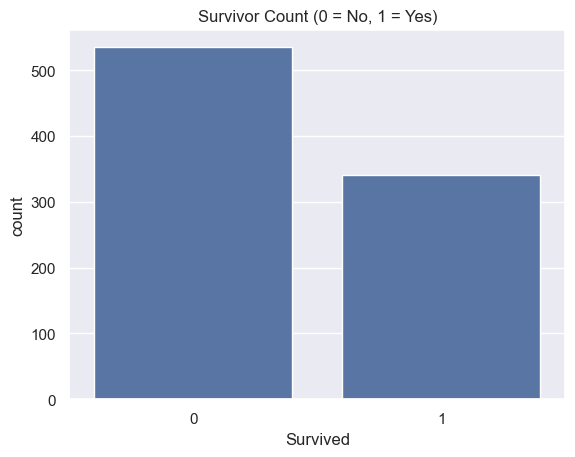

In [13]:
# Plot 1: Count of Survivors
sns.countplot(data=df, x='Survived')
plt.title('Survivor Count (0 = No, 1 = Yes)')
plt.show()


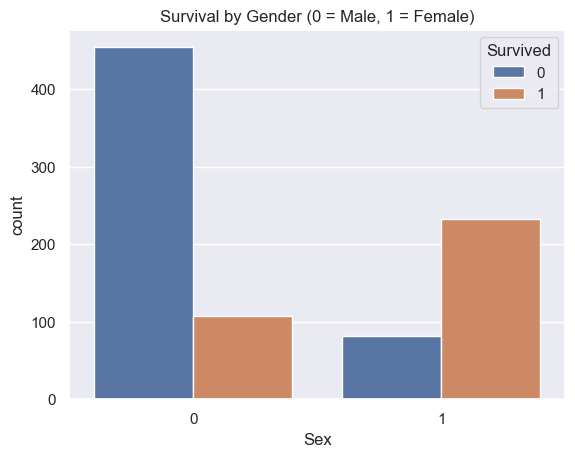

In [14]:
# Plot 2: Survival by Gender
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival by Gender (0 = Male, 1 = Female)')
plt.show()

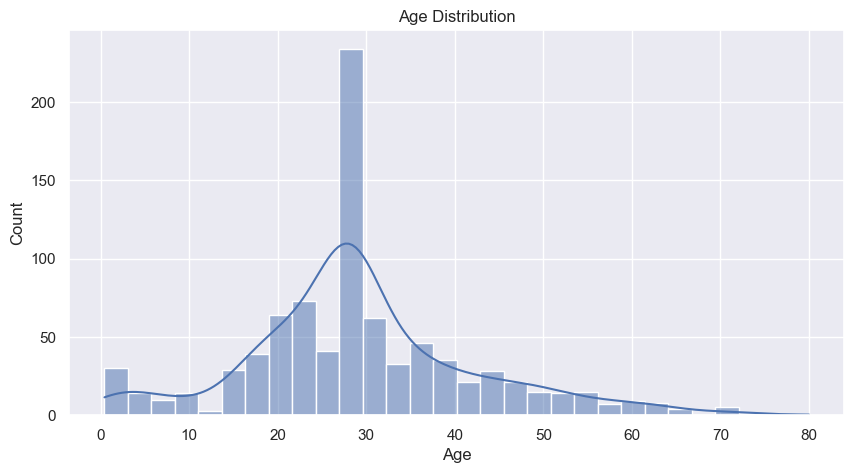

In [15]:
# Plot 3: Age Distribution
plt.figure(figsize=(10,5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

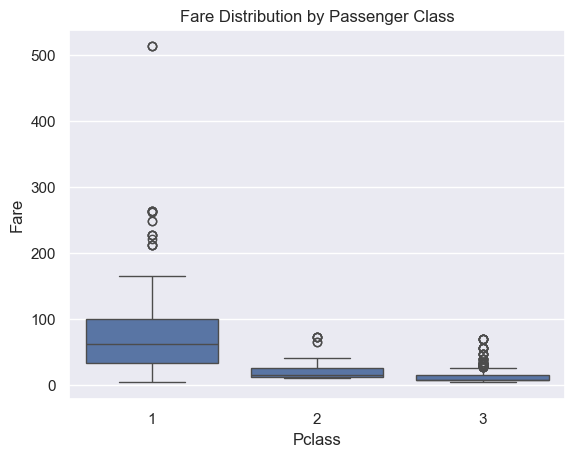

In [16]:
# Plot 4: Boxplot of Fare by Class
sns.boxplot(data=df, x='Pclass', y='Fare')
plt.title('Fare Distribution by Passenger Class')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [18]:
# Choose features (X) and target (y)
features = ['Pclass', 'Sex', 'Age', 'Fare']
X = df[features]
y = df['Survived']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [21]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7784090909090909

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.79      0.82       113
           1       0.67      0.76      0.71        63

    accuracy                           0.78       176
   macro avg       0.76      0.77      0.77       176
weighted avg       0.79      0.78      0.78       176



In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))

Decision Tree Accuracy: 0.7840909090909091


In [23]:
# Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

Random Forest Accuracy: 0.7954545454545454


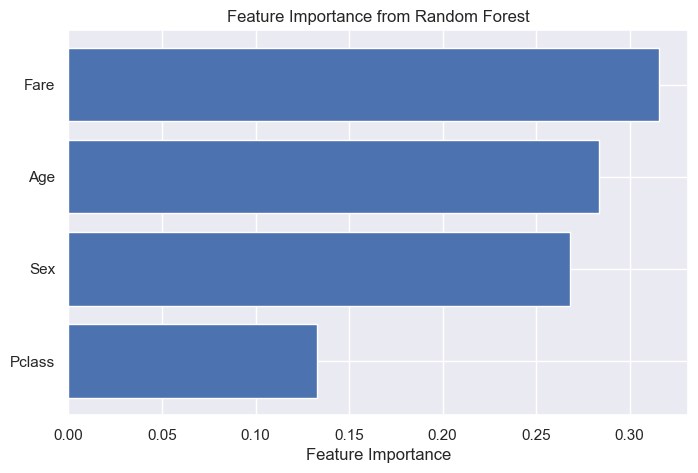

In [24]:
# Show feature importance
import matplotlib.pyplot as plt

importances = rf.feature_importances_
features = X.columns

# Create a bar plot
plt.figure(figsize=(8, 5))
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance from Random Forest")
plt.show()

In [25]:
# Task 9: KNN Classifier

from sklearn.neighbors import KNeighborsClassifier

# Create and train the model
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

# Predict
knn_pred = knn.predict(X_test)

# Evaluate
from sklearn.metrics import accuracy_score
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))


KNN Accuracy: 0.6647727272727273


In [26]:
# Support Vector Machine (SVM)

from sklearn.svm import SVC

# Create and train the model
svm = SVC()
svm.fit(X_train, y_train)

# Predict
svm_pred = svm.predict(X_test)

# Evaluate
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))


SVM Accuracy: 0.6590909090909091


In [27]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Create the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict
xgb_pred = xgb_model.predict(X_test)

# Evaluate
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))

XGBoost Accuracy: 0.7727272727272727


In [28]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

# GridSearch for best parameters
grid_search = GridSearchCV(estimator=xgb.XGBClassifier(random_state=42), param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best model
best_xgb_model = grid_search.best_estimator_

# Evaluate
y_pred_best = best_xgb_model.predict(X_test)
print("Best XGBoost Accuracy:", accuracy_score(y_test, y_pred_best))

Best Parameters: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 50}
Best XGBoost Accuracy: 0.8352272727272727


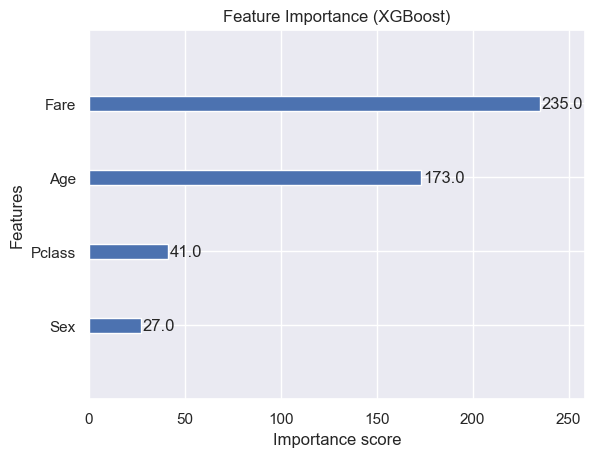

In [29]:
# Feature Importance with XGBoost
import matplotlib.pyplot as plt

# Plot feature importance
xgb.plot_importance(best_xgb_model, importance_type="weight")
plt.title("Feature Importance (XGBoost)")
plt.show()

In [32]:
import pickle
from sklearn.ensemble import RandomForestClassifier

# Train the model (example using RandomForestClassifier)
model = RandomForestClassifier()
model.fit(X_train, y_train)  # Assuming you've already trained it

# Save the model using pickle
with open('titanic_model.pkl', 'wb') as file:
    pickle.dump(model, file)
